<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day_077_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
import os
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Input
from keras import optimizers
#from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
def load_data():
    (train_x, train_y), (test_x, test_y) = cifar10.load_data()
    print(f'Train_set: X={train_x.shape}, Y={train_y.shape}')
    print(f'Test_set: X={test_x.shape}, Y={test_y.shape}')
    
    train_x = train_x.reshape(len(train_x), -1)
    test_x = test_x.reshape(len(test_x), -1)
    print('X data:RGB to one channel')
    print(f'X_Train: X={train_x.shape}')
    print(f'X_Test: X={test_x.shape}')
    
    train_y = to_categorical(train_y)
    test_y = to_categorical(test_y)
    print('After OneHotEncoding')
    print(f'Train_set: Y={train_y.shape}')
    print(f'Test_set: Y={test_y.shape}')
    return train_x, train_y, test_x, test_y

In [0]:
def scaling_pixel(train, test):
    norm_train_x = train_x / 255.0
    norm_test_x = test_x / 255.0
    return norm_train_x, norm_test_x

In [0]:
train_x, train_y, test_x, test_y = load_data()
train_x, test_x = scaling_pixel(train_x, test_x)

Train_set: X=(50000, 32, 32, 3), Y=(50000, 1)
Test_set: X=(10000, 32, 32, 3), Y=(10000, 1)
X data:RGB to one channel
X_Train: X=(50000, 3072)
X_Test: X=(10000, 3072)
After OneHotEncoding
Train_set: Y=(50000, 10)
Test_set: Y=(10000, 10)


In [0]:
def build_mlp(in_shape, opt):
    model = Sequential()
    input_layer = Input([in_shape[1]])
    x = Dense(units=512, activation='relu')(input_layer)
    #x = Dropout(0.2)(x)
    x = Dense(units=256, activation='relu')(x)
    #x = Dropout(0.2)(x)
    x = Dense(units=128, activation='relu')(x)
    #x = Dropout(0.2)(x)
    x = Dense(units=64, activation='relu')(x)
    #x = Dropout(0.25)(x)
    out = Dense(units=10, activation='softmax')(x)
    model = keras.models.Model(inputs=input_layer, outputs=out)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
opt = optimizers.SGD(lr=0.01, momentum=0.8)
model = build_mlp(train_x.shape, opt)

In [0]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [0]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________

In [0]:
"""
設定要訓練的 Epoch 數
"""
model.fit(train_x, train_y, 
          epochs=500, 
          batch_size=256, 
          validation_data=(test_x, test_y),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.9502 - acc: 0.2926 - val_loss: 1.8495 - val_acc: 0.3439
Epoch 2/500
50000/50000 [==============================] - 11s 224us/step - loss: 1.7349 - acc: 0.3781 - val_loss: 1.6969 - val_acc: 0.4049
Epoch 3/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.6382 - acc: 0.4186 - val_loss: 1.6146 - val_acc: 0.4284
Epoch 4/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.5736 - acc: 0.4398 - val_loss: 1.5795 - val_acc: 0.4235
Epoch 5/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.5230 - acc: 0.4571 - val_loss: 1.6092 - val_acc: 0.4268
Epoch 6/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.4814 - acc: 0.4713 - val_loss: 1.4953 - val_acc: 0.4642
Epoch 7/500
50000/50000 [==============================] - 11s 220us/step - loss: 1.4516 - acc: 0.4831 - val_l

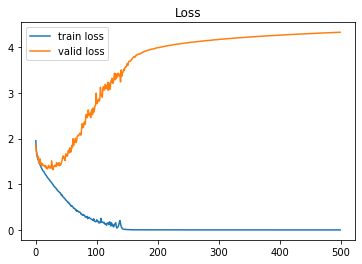

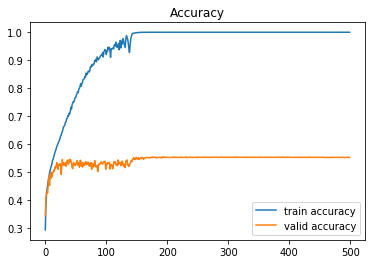

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()